# Sign language: neural networks

## Initialisations

In [33]:
# Directive for displaying graphs in Jupyter
%matplotlib inline

# Pandas : data manipulation and analysis library
# NumPy : library for numerical computations
# MatPlotLib : plotting library
# Seaborn : statistical data visualization library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import model_selection

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.model_selection import train_test_split

from sklearn import datasets

In [34]:
df=pd.read_csv('archive/sign_mnist_train.csv')
df_test=pd.read_csv('archive/sign_mnist_test.csv')

In [35]:
df.shape

(27455, 785)

In [36]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


The dataset is well balanced (but the letters Y and Z are missing):

In [37]:
# df.label.value_counts()

In [38]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [39]:
# We convert the pixel lines into matrices (images):
n_samples = len(df.index)
images = np.array(df.drop(['label'],axis=1))
images = images.reshape(n_samples,28,28)

print("Number of samples: ", n_samples)

Number of samples:  27455


In [40]:
# We visualize some samples of the dataset:
plt.figure(figsize=(10,20))
for i in range(0,49) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(images[i], cmap="gray_r")
    plt.title(labels[df.label[i]])

In [41]:
# We separate features and labels:
y = df['label']
X = df.drop(['label'] , axis=1)

#  Also for the test set:
y_test = df_test['label']
X_test = df_test.drop(['label'] , axis=1)

In [42]:
# We normalize the data to have values between 0 and 1:
X = X/255
X_test = X_test/255


Séparation train / test :

In [43]:
# We split the data into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

On utilise la méthode *MLPClassifier* de *sklearn* pour utiliser un réseau de neurones à deux couches cachées de 200 et 60 neurones :

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(200,60),max_iter =100, n_iter_no_change=10, early_stopping=True, verbose=True)
# .fit method trains the model
mlp.fit(X_train,y_train)
# Training accuracy
# .score method computes the accuracy for given data and labels
train_accuracy = mlp.score(X_train,y_train)
print("Training accuracy: ", train_accuracy)
# Validation accuracy
val_accuracy = mlp.score(X_val,y_val)
print("Validation accuracy: ", val_accuracy)


# We make predictions on the test set
y_pred = mlp.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, y_pred))

# We print the classification report
# classification_report gives precision, recall, f1-score and support for each class
print(classification_report(y_test, y_pred, target_names=labels))

Iteration 1, loss = 2.82933842
Validation score: 0.293127
Iteration 2, loss = 1.94749760
Validation score: 0.460628
Iteration 3, loss = 1.49330177
Validation score: 0.582157
Iteration 4, loss = 1.24479755
Validation score: 0.661356
Iteration 5, loss = 1.07802811
Validation score: 0.694128
Iteration 6, loss = 0.94018195
Validation score: 0.735548
Iteration 7, loss = 0.82792582
Validation score: 0.767410
Iteration 8, loss = 0.76050818
Validation score: 0.793810
Iteration 9, loss = 0.67122034
Validation score: 0.807465
Iteration 10, loss = 0.61522918
Validation score: 0.820665
Iteration 11, loss = 0.54483113
Validation score: 0.834320
Iteration 12, loss = 0.49547251
Validation score: 0.854347
Iteration 13, loss = 0.44128890
Validation score: 0.874829
Iteration 14, loss = 0.38746915
Validation score: 0.909422
Iteration 15, loss = 0.35259583
Validation score: 0.927173
Iteration 16, loss = 0.31175214
Validation score: 0.910332
Iteration 17, loss = 0.27311508
Validation score: 0.924442
Iterat

ValueError: Number of classes, 24, does not match size of target_names, 26. Try specifying the labels parameter

La pertinence est très bonne :

In [ ]:
mlp_score = accuracy_score(y_test, y_mlp)
print(mlp_score)

0.9996357676197414


et la matrice de confusion :

In [ ]:
pd.crosstab(y_test, y_mlp, rownames=['Reel'], colnames=['Prediction'], margins=True)

Prediction,0,1,2,3,4,5,6,7,8,10,...,16,17,18,19,20,21,22,23,24,All
Reel,,,,,,,,,,,,,,,,,,,,,
0,223,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,223
1,0,176,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,176
2,0,0,250,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,250
3,0,0,0,229,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,229
4,0,0,0,0,178,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,178
5,0,0,0,0,0,249,0,0,0,0,...,0,0,0,0,0,0,0,0,0,249
6,0,0,0,0,0,0,205,0,0,0,...,0,0,0,0,0,0,0,0,0,205
7,0,0,0,0,0,0,0,195,0,0,...,0,0,0,0,0,0,0,0,0,195
8,0,0,0,0,0,0,0,0,216,0,...,0,0,0,0,0,0,0,0,0,216


## Réseaux denses (Keras/Tensorflow)

La définition du même réseau de neurones est un peu plus compliquée avec *Keras*, mais il est utile de comprendre cette première étape avant d'utiliser les réseaux convolutifs

Comme l'activation d'un neurone donne une valeur (probabilité) entre 0 ou 1, on code la cible (classes entre 0 et 24) sous la forme d'un vecteur de 0 ou 1 (*one hot encoding*) avec *to_categorical* :

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
print(y[0])
y_cat = to_categorical(y)
print(y_cat[0])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


On a seulement 25 classes (il manque les Y et Z dans le dataset) :

In [ ]:
num_classes = y_cat.shape[1]
print(num_classes)

25


On sépare train et test :

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=1)

Pour Keras, il est nécessaire d'avoir des tableaux et non des dataframes :

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

On va utiliser une architecture en *couches* (modèle *Sequential*), avec des couches *denses* :

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

On définit un modèle à deux couches cachées de 200 et 60 neurones  
La dernière couche comporte 25 neurones (le nombre de classes) pour la classification :

In [ ]:
model = Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

L'activation de la dernière couche est un *softmax* : la somme des valeurs de l'activation des neurones de la dernière couche est 1  
(on interprète la sortie des derniers neurones comme une probabilité d'appartenance à la classe correspondante)

On "compile" le modèle, avec une *categorical_crossentropy* comme mesure de distance (distance probabiliste multi classes)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train = model.fit(X_train , y_train , validation_data=(X_test,y_test), epochs=30, verbose=1)

Train on 21964 samples, validate on 5491 samples
Epoch 1/30
21964/21964 [==============================] - 3s 156us/step - loss: 2.2876 - accuracy: 0.2935 - val_loss: 1.5923 - val_accuracy: 0.4879
Epoch 2/30
21964/21964 [==============================] - 3s 143us/step - loss: 1.3229 - accuracy: 0.5773 - val_loss: 1.1135 - val_accuracy: 0.6369
Epoch 3/30
21964/21964 [==============================] - 3s 142us/step - loss: 0.9740 - accuracy: 0.6843 - val_loss: 0.8072 - val_accuracy: 0.7418
Epoch 4/30
21964/21964 [==============================] - 3s 141us/step - loss: 0.7389 - accuracy: 0.7623 - val_loss: 0.6425 - val_accuracy: 0.7986
Epoch 5/30
21964/21964 [==============================] - 3s 142us/step - loss: 0.5595 - accuracy: 0.8267 - val_loss: 0.5038 - val_accuracy: 0.8421
Epoch 6/30
21964/21964 [==============================] - 3s 140us/step - loss: 0.4134 - accuracy: 0.8735 - val_loss: 0.3459 - val_accuracy: 0.9037
Epoch 7/30
21964/21964 [==============================] - 3s 13

Pertinence :

In [ ]:
model.evaluate(X_test,y_test)

5491/5491 [==============================] - 0s 37us/step


[0.004794832854391778, 0.9998179078102112]

La variable *train* mémorise l'historique des scores sur l'ensemble d'apprentissage :

In [ ]:
print(train.history['accuracy'])

[0.29352576, 0.5772628, 0.68430156, 0.76229286, 0.8267164, 0.8734748, 0.8995629, 0.9279275, 0.94582045, 0.96435076, 0.96184665, 0.97541434, 0.97996724, 0.9877982, 0.9777363, 0.9710435, 0.9972227, 0.981151, 0.98752505, 0.99134946, 0.99995446, 0.9740029, 0.9998634, 0.9998179, 0.9737297, 0.99713165, 0.98283553, 0.9998179, 1.0, 0.97468585]


et sur l'ensemble de validation :

In [ ]:
print(train.history['val_accuracy'])

[0.48788926005363464, 0.6368603110313416, 0.7417592406272888, 0.7985795140266418, 0.8421052694320679, 0.9036605358123779, 0.9311600923538208, 0.9655800461769104, 0.9646694660186768, 0.973957359790802, 0.9890730381011963, 0.9938080310821533, 0.9932616949081421, 0.9750500917434692, 0.9943544268608093, 0.9841558933258057, 0.995993435382843, 0.9746858477592468, 0.9990894198417664, 0.9998179078102112, 1.0, 1.0, 1.0, 1.0, 0.9994536638259888, 0.9714077711105347, 1.0, 1.0, 1.0, 0.9998179078102112]


On définit une fonction pour afficher un graphique des scores :

In [ ]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

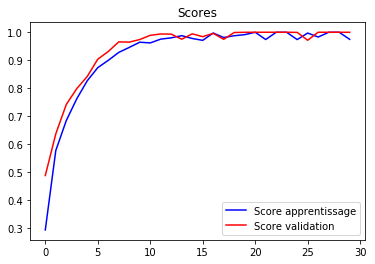

In [ ]:
plot_scores(train)

## Exercice : tester les réseaux de neurones sur le dataset *fashion_MNIST*